In [2]:
!pip install rebound

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.3/785.3 kB 8.5 MB/s eta 0:00:00


In [10]:
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [103]:
masa_sol = 1
masa_planeta = 5e-4 #masas solares
masa_part = 1e-9

G = 4*(np.pi**2)
r_planeta = 7.5
eleccion_L4_L5 = "L4"

In [104]:
vel_angu = np.sqrt(G*masa_sol/r_planeta**3)

if eleccion_L4_L5 == "L4":
    x_planeta = r_planeta
    y_planeta = 0
    x_particula = r_planeta * np.cos(np.pi / 3)
    y_particula = r_planeta * np.sin(np.pi / 3)

    v_planeta = vel_angu * r_planeta
    vx_planeta = 0
    vy_planeta = v_planeta

    v_particula = vel_angu * r_planeta #velocidad de la particula (el radio cuadrado se saca)
    vx_particula = -v_particula * np.sin(np.pi / 3)
    vy_particula = v_particula * np.cos(np.pi / 3)
elif eleccion_L4_L5 == "L5":
    x_planeta = r_planeta
    y_planeta = 0
    x_particula = r_planeta * np.cos(-np.pi / 3)
    y_particula = r_planeta * np.sin(-np.pi / 3)

    v_planeta = vel_angu * r_planeta
    vx_planeta = 0
    vy_planeta = v_planeta

    v_particula = vel_angu * r_planeta
    vx_particula = -v_particula * np.sin(-np.pi / 3)
    vy_particula = v_particula * np.cos(-np.pi / 3)

In [105]:
#iniciar simulacion

sim = rebound.Simulation()
sim.units = ('AU', 'year', 'Msun')  # Definir unidades
sim.integrator = "ias15"  # Método de integración
sim.dt = 0.01  # Paso de tiempo

# Añadir el Sol, el planeta y la partícula a la simulación
sim.add(m=masa_sol, x=0, y=0, vx=0, vy=0)  # Sol
sim.add(m=masa_planeta, x=x_planeta, y=y_planeta, vx=vx_planeta, vy=vy_planeta)  # Planeta
sim.add(m=masa_part, x=x_particula, y=y_particula, vx=vx_particula, vy=vy_particula)  # Partícula

In [106]:
# Calcular los puntos L4 y L5
x_L4 = r_planeta * np.cos(np.pi / 3)
y_L4 = r_planeta * np.sin(np.pi / 3)
x_L5 = r_planeta * np.cos(-np.pi / 3)
y_L5 = r_planeta * np.sin(-np.pi / 3)

In [115]:
# Ejecutar la simulación
times = np.linspace(0, 18, 100)  # Simular durante 10 y 18 años
x_sol, y_sol = [], []
x_planeta, y_planeta = [], []
x_particula, y_particula = [], []

for time in times:
    sim.integrate(time)
    x_sol.append(sim.particles[0].x)  # Sol
    y_sol.append(sim.particles[0].y)
    x_planeta.append(sim.particles[1].x)  # Planeta
    y_planeta.append(sim.particles[1].y)
    x_particula.append(sim.particles[2].x)  # Partícula
    y_particula.append(sim.particles[2].y)


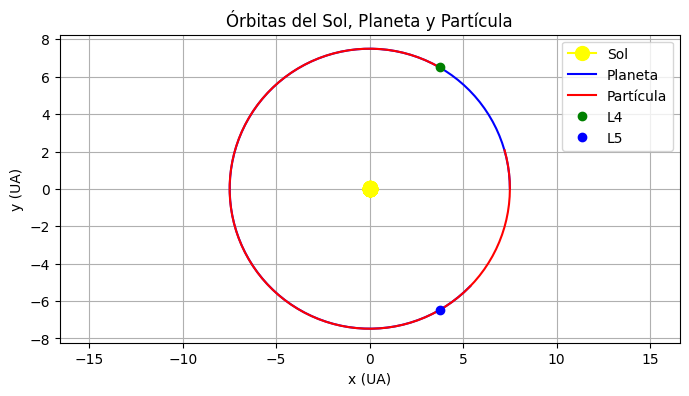

In [116]:
# Graficar las órbitas
plt.figure(figsize=(8, 4))
plt.plot(x_sol, y_sol, label="Sol", color="yellow", marker="o", markersize=10)
plt.plot(x_planeta, y_planeta, label="Planeta", color="blue")
plt.plot(x_particula, y_particula, label="Partícula", color="red")

# Graficar puntos L4 y L5
plt.plot(x_L4, y_L4, 'go', label="L4")
plt.plot(x_L5, y_L5, 'bo', label="L5")

plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Órbitas del Sol, Planeta y Partícula')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Mantener la relación de aspecto
plt.show()